IMPORTING THE DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

IMPORTING THE BOSTON HOUSE PRICE DATASET

In [2]:
House_price_dataset= sklearn.datasets.load_boston()

c:\Users\GM-RAO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [3]:
print(House_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
# Loading the dataset to Pandas DataFrame
House_price_dataframe = pd.DataFrame(House_price_dataset.data,columns = House_price_dataset.feature_names)

In [5]:
House_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# add the target(price) column to the Dataframe
House_price_dataframe['Price'] = House_price_dataset.target

In [7]:
House_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# checking the rows and columns of the the dataframe
House_price_dataframe.shape

(506, 14)

In [9]:
# checking the missing values
House_price_dataframe.isnull().sum() # 0-no null values,1-null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [10]:
# Statistical measures of the dataset
House_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
# Information of the dataset
House_price_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


UNDERSTANDING THE CORREALATION BETWEEN THE DATA

1.POSITIVE CORRELATION

2.NEGATIVE CORRELATION


In [14]:
correlation = House_price_dataframe.corr()
print(correlation)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

<AxesSubplot: >

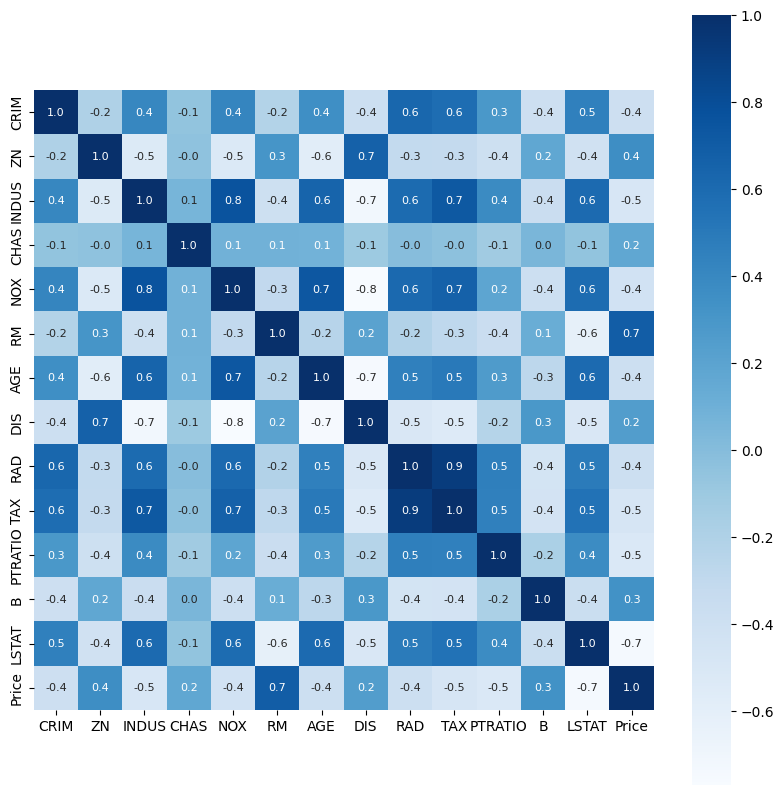

In [15]:
# Constructing the heatmap to understand the correlation

plt.figure(figsize=(10,10)) #figsize represents the size of the plot
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

#cbar represents colorbar(true) which means the vertical bar is okay
#square means we want all the values to be mentioned in a square
#fmt -float values .1f means one value after each decimal point
# annot(annotations) means the feature values 
#snnot_kws size means the size of the fetaures the text and the values 
#cmap is colour of the map
# here the dark block rep the positive correlated and light color block rep negative correltaed

SPLITTING THE DATA AND TARGET

In [16]:
X = House_price_dataframe.drop(['Price'],axis=1) # it rep all the 13 columns
Y = House_price_dataframe['Price'] #it rep only one column which is dropped

In [17]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [18]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64


SPLITING THE DATA INTO TRAINING DATA AND TRAINING DATA

In [21]:
# X_train- the training data coressponding to Y-train will be stored
# X_test - It will be used to evaluate data using Y_test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [87]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


MODEL TRAINING

XGBOOST REGRESSOR

In [22]:
#Xgboost is a type of decision tree algorithm
#Loading the model
model = XGBRegressor()

In [23]:
#training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

EVALUATION 

PREDICTION ON THE TRAINING DATA

In [24]:
# Accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [25]:
print(training_data_prediction)

[37.89484   15.622262  45.397976  15.71571   22.600328  14.525575
 18.718586  17.788744  16.119219  20.603434  31.601236  29.100245
 15.64212   17.521263  22.494436  19.403002  19.29794    8.499994
 20.596195  16.9993    17.106352  14.478494  49.979706  14.27727
 12.607338  28.686445  21.195976  19.298525  23.088985  19.108793
 25.00973   33.406292   4.996218  29.585705  18.690695  21.69115
 23.08497   22.802591  21.017418  48.795303  14.608154  16.612467
 27.071402  20.082766  19.78823   20.973423  41.29459   23.158121
 20.36598   18.555063  29.39788   36.393707  24.44932   11.797677
 13.801016  12.231553  17.783297  33.096004  26.70657   13.403824
 14.395811  50.00409   21.99245   19.903318  23.797016  17.52785
 12.644246   5.597939  31.09989   26.216806  19.398756  16.697472
 13.802534  22.896656  15.322881  27.485867  36.09922   22.895216
 24.487465  24.971888  50.00885   34.871044  31.751328  24.112175
 22.117153  14.121233  42.794674  19.312931  32.207844  26.375904
 21.796368  2

In [26]:
# R squared error
score_01 = metrics.r2_score(Y_train,training_data_prediction)

# Mean absolute Value
score_02 = metrics.mean_absolute_error(Y_train,training_data_prediction)

print("R Squared Error:",score_01)
print("Mean Absolute Error:",score_02)

R Squared Error: 0.9999956503891761
Mean Absolute Error: 0.01377696663848957


VISUALIZING THE ACTUAL PRICES AND PREDICTED PRICES

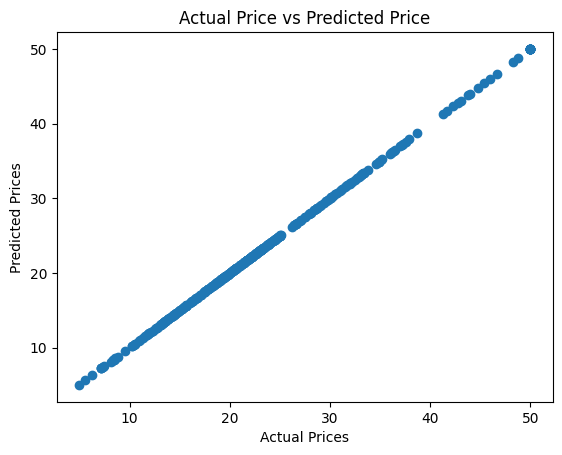

In [27]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

PREDICTION ON TEST DATA

In [28]:
# accuracy for prediction on test data
testing_data_prediction = model.predict(X_test)

# R squared error
score_01 = metrics.r2_score(Y_test,testing_data_prediction)

# Mean absolute Value
score_02 = metrics.mean_absolute_error(Y_test,testing_data_prediction)

print("R Squared Error:",score_01)
print("Mean Absolute Error:",score_02)

R Squared Error: 0.8563261418953055
Mean Absolute Error: 2.1403884940260043


In [29]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

In [30]:
forest.fit(X_train,Y_train)

RandomForestRegressor()

In [31]:
training_data_prediction1 = forest.predict(X_train)

In [32]:
print(training_data_prediction1)

[36.555 16.319 45.193 15.778 22.84  16.585 18.499 16.372 18.323 20.287
 31.139 29.116 15.98  17.781 23.265 19.758 19.044  7.868 21.018 16.85
 16.015 14.681 47.338 14.716 13.99  26.912 21.009 19.515 21.939 18.001
 24.346 34.565  6.546 27.276 19.187 21.204 23.013 22.09  21.983 46.907
 15.07  16.949 23.822 20.321 19.955 21.1   37.564 21.863 19.958 19.688
 28.651 35.963 24.321 12.632 12.556 11.196 16.817 32.293 27.469 13.945
 13.942 46.628 21.795 20.416 23.049 18.262 12.632  6.506 30.898 26.189
 19.018 15.529 14.104 22.879 17.057 27.033 34.911 22.875 23.697 23.853
 49.675 34.498 31.799 23.944 22.687 14.468 41.315 19.61  32.04  25.179
 21.099 21.498  8.761 45.973 43.315 32.22   9.188 16.299 20.441 34.093
 16.878 45.24  20.947 22.939 12.318 19.967 24.336 29.653 28.859 22.344
 30.124 25.061 32.722 24.244 21.004 24.062 10.119 24.434 22.704 17.51
  8.874 19.63  24.749 23.238 19.651 22.429 13.303 31.154 26.697 34.072
 13.117 15.367 13.139 14.442 11.169 24.689 16.914 10.868 22.084 14.862
 24.343 

In [33]:
# R squared error
score_02 = metrics.r2_score(Y_train,training_data_prediction1)

# Mean absolute Value
score_03 = metrics.mean_absolute_error(Y_train,training_data_prediction1)

print("R Squared Error:",score_02)
print("Mean Absolute Error:",score_03)

R Squared Error: 0.9797644537843203
Mean Absolute Error: 0.8955989445910285


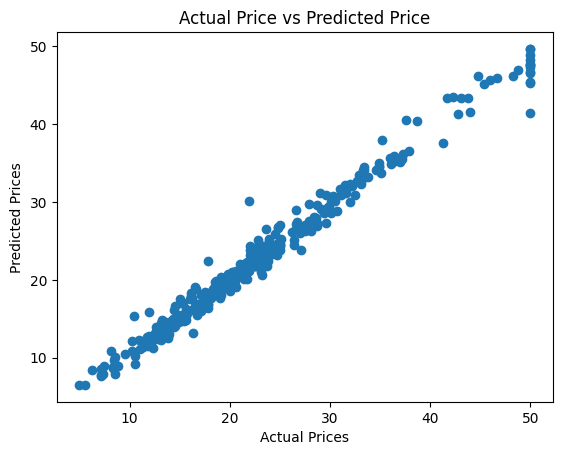

In [34]:
plt.scatter(Y_train,training_data_prediction1)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [35]:
# accuracy for prediction on test data
testing_data_prediction1 = forest.predict(X_test)

# R squared error
score_04 = metrics.r2_score(Y_test,testing_data_prediction)

# Mean absolute Value
score_05 = metrics.mean_absolute_error(Y_test,testing_data_prediction)

print("R Squared Error:",score_04)
print("Mean Absolute Error:",score_05)

R Squared Error: 0.8563261418953055
Mean Absolute Error: 2.1403884940260043


In [36]:
from sklearn.metrics import accuracy_score


In [39]:
Y_pred = forest.predict(X_test)  

In [41]:
threshold = 0.5  # Define a threshold value
binary_predictions = (Y_test >= threshold).astype(int)


## Prediction System

In [58]:
import pickle
pickle.dump(model,open("House-Prediciton-xgb.pkl","wb"))

In [59]:
with open('House-Prediciton-xgb.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [60]:
loaded_model = pickle.load(open("House-Prediciton-xgb.pkl", "rb"))
loaded_model.predict(X_test)

array([22.910929 , 31.155867 , 15.887421 , 23.100609 , 19.050152 ,
       21.10486  , 18.60204  , 14.319484 , 21.23493  , 21.218063 ,
       22.394123 , 16.949715 ,  8.681659 , 20.44633  , 20.40552  ,
       25.97767  , 20.310589 ,  9.379351 , 46.06987  , 15.082202 ,
       24.834572 , 25.57381  , 13.741687 , 23.093166 , 16.282576 ,
       16.421665 , 22.015497 , 12.87805  , 21.406013 , 21.683708 ,
       19.94686  , 23.47532  , 24.007748 , 22.20126  , 16.437689 ,
       16.521025 , 27.016825 , 18.411413 , 22.921436 , 23.645731 ,
       16.488846 , 28.575102 , 46.11106  , 20.070225 , 22.412487 ,
       13.694452 , 15.14329  , 23.596334 , 18.736343 , 26.696985 ,
       21.089212 , 35.17401  , 18.196396 , 27.08036  , 46.863987 ,
       20.679482 , 16.049906 , 32.55103  , 21.571451 , 18.330172 ,
       22.97663  , 34.3969   , 29.211058 , 17.329239 , 27.019566 ,
       16.692804 , 13.202091 , 23.047838 , 29.028646 , 16.283152 ,
       19.920376 , 27.898617 ,  8.898388 , 21.338318 , 20.9679

In [61]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


In [62]:
X_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [63]:
Y_train.head(5)

182    37.9
155    15.6
280    45.4
126    15.7
329    22.6
Name: Price, dtype: float64

In [64]:
import pandas as pd

# Create a DataFrame with the new data in the same format as the training data
New_data = pd.DataFrame([[0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04]], columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT'])

In [65]:
import pandas as pd

# Create a DataFrame with the new data in the same format as the training data
New_data1 = pd.DataFrame([[0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]], columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT'])

In [66]:
# Make predictions using the loaded model
predicted_price_house = loaded_model.predict(New_data1)

print("Predicted Price:", predicted_price_house[0])

Predicted Price: 26.696985


In [67]:
# Make predictions using the loaded model
predicted_price_house = loaded_model.predict(New_data)

print("Predicted Price:", predicted_price_house[0])

Predicted Price: 22.910929
